In [253]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [254]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [255]:
from TileEM_plot_toolbox import *
from qualityBaseline import *
from glob import glob

In [256]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
Nsample_lst = worker_Nbatches.keys()

# Data Table 

In [257]:
PR_tbl = pd.read_csv("GT_PR.csv",index_col=0)
PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})

In [ ]:
base_dir = 'stored_ptk_run'
for Nworker in sampleN_lst:
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "{0}worker_rand{1}".format(Nworker,batch_num)

        print "Working on :", dir_name
        os.chdir(base_dir+dir_name)
        
        PR_tbl = pd.read_csv("GT_PR.csv",index_col=0)
        PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})
        #df = df.merge(PR_tbl[["object_id","P [GT Tile-based]","R [GT Tile-based]"]],on="object_id")
        os.chdir("../../")

In [68]:
def selected_attr2col_lst(selected_attr_lst):
    selected_col_lst =[]
    for attr in selected_attr_lst:
        selected_col_lst.append("P [{}]".format(attr))
        selected_col_lst.append("R [{}]".format(attr))
    return selected_col_lst

In [61]:
from tabulate import tabulate

In [64]:
ls -ltr concat_sample10_PR.csv

-rw-rw----. 1 jlee782 jlee782 173686 May  3 10:14 concat_sample10_PR.csv


In [258]:
Nsample=5
df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample),index_col=0)
df = data_clean(df)

In [259]:
def data_clean(df):
    df = df.rename(index=str,columns={'P [Jaccard [Self]]':'P [GT Jaccard]','R [Jaccard [Self]]':'R [GT Jaccard]',\
                             'P [Precision [Self]]':'P [GT Precision]','R [Precision [Self]]':'R [GT Precision]',\
                             'P [Recall [Self]]':'P [GT Recall]','R [Recall [Self]]':'R [GT Recall]',\
                            })
    return df

In [260]:
best_TileEM_attr = 'TileEM thres=40'
selected_attr_lst = ['Num Points','Area Ratio','MVT','GT Precision','GT Recall','GT Jaccard','Vision GT 50%']
selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)

In [278]:
df.columns

Index([u'Unnamed: 0', u'object_id', u'P [Num Points]', u'R [Num Points]',
       u'P [Area Ratio]', u'R [Area Ratio]', u'P [GT Jaccard]',
       u'R [GT Jaccard]', u'P [GT Precision]', u'R [GT Precision]',
       u'P [GT Recall]', u'R [GT Recall]', u'P [Vision Best Area Ratio 50%]',
       u'R [Vision Best Area Ratio 50%]', u'P [Vision Best Num Points 50%]',
       u'R [Vision Best Num Points 50%]', u'P [Vision GT 10%]',
       u'R [Vision GT 10%]', u'P [Vision GT 50%]', u'R [Vision GT 50%]',
       u'P [Vision GT 90%]', u'R [Vision GT 90%]', u'P [TileEM thres=-40]',
       u'R [TileEM thres=-40]', u'P [TileEM thres=-20]',
       u'R [TileEM thres=-20]', u'P [TileEM thres=0]', u'R [TileEM thres=0]',
       u'P [TileEM thres=20]', u'R [TileEM thres=20]', u'P [TileEM thres=40]',
       u'R [TileEM thres=40]', u'P [MVT]', u'R [MVT]', u'P [MVTtop10]',
       u'R [MVTtop10]', u'P [MVTtop95%]', u'R [MVTtop95%]'],
      dtype='object')

In [286]:
df_all = pd.DataFrame()
cols  = []
for Nsample in sorted(Nsample_lst):
    df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample),index_col=10)
    df = data_clean(df)
    cols.append(Nsample)
    df_all[Nsample]=df[df.keys()[2:]].mean()

In [127]:
# #reordering columns so that sort by category + limit 
# df_all.reindex([u'P [Num Points]', u'R [Num Points]', u'P [Area Ratio]',
#                u'R [Area Ratio]',u'P [GT Precision]', u'R [GT Precision]', u'P [GT Recall]',
#                u'R [GT Recall]', u'P [TileEM]', u'R [TileEM]', u'P [MVT]', u'R [MVT]',
#                 u'P [Vision Best Area Ratio 50%]',
#                u'R [Vision Best Area Ratio 50%]', u'P [Vision Best Num Points 50%]',
#                u'R [Vision Best Num Points 50%]', u'P [Vision GT 50%]',
#                u'R [Vision GT 50%]'])

In [279]:
ls -ltr concat_sample25_PR.csv

-rw-rw----. 1 jlee782 jlee782 48936 May  4 10:17 concat_sample25_PR.csv


In [292]:
df_all.filter(regex="R",axis=0)

,5,10,15,20,25,30
R [Num Points],0.863541,0.855419,0.852955,0.853587,0.857427,0.830716
P [Area Ratio],0.760718,0.704353,0.657214,0.626521,0.593587,0.585438
R [Area Ratio],0.881496,0.888911,0.877514,0.856234,0.847974,0.838811
R [GT Jaccard],0.896307,0.920284,0.914023,0.910744,0.911147,0.913797
R [GT Precision],0.839045,0.817644,0.802114,0.786852,0.770023,0.769928
R [GT Recall],0.914442,0.946607,0.942185,0.938620,0.940996,0.942123
P [Vision Best Area Ratio 50%],0.763503,0.696293,0.666955,0.649347,0.620026,0.607808
R [Vision Best Area Ratio 50%],0.770788,0.740952,0.737896,0.729868,0.726895,0.719760
R [Vision Best Num Points 50%],0.761698,0.733879,0.731924,0.728302,0.740929,0.718649
R [Vision GT 10%],0.840638,0.836316,0.839343,0.837849,0.839484,0.840209


In [138]:
print tabulate(df_all,headers='keys',tablefmt="latex",floatfmt='.2f')

\begin{tabular}{lrrrr}
\hline
                     &    5 &   10 &   15 &   20 \\
\hline
 P [Num Points]      & 0.88 & 0.79 & 0.77 & 0.80 \\
 R [Num Points]      & 0.89 & 0.81 & 0.81 & 0.84 \\
 P [Area Ratio]      & 0.81 & 0.68 & 0.63 & 0.64 \\
 R [Area Ratio]      & 0.89 & 0.84 & 0.83 & 0.84 \\
 P [MVT]             & 0.85 & 0.82 & 0.80 & 0.79 \\
 R [MVT]             & 0.81 & 0.57 & 0.48 & 0.38 \\
 P [GT Precision]    & 0.96 & 0.89 & 0.89 & 0.93 \\
 R [GT Precision]    & 0.87 & 0.78 & 0.76 & 0.77 \\
 P [GT Recall]       & 0.90 & 0.78 & 0.76 & 0.77 \\
 R [GT Recall]       & 0.97 & 0.90 & 0.89 & 0.93 \\
 P [GT Jaccard]      & 0.95 & 0.87 & 0.87 & 0.90 \\
 R [GT Jaccard]      & 0.96 & 0.87 & 0.87 & 0.91 \\
 P [Vision GT 50\%]   & 0.92 & 0.90 & 0.90 & 0.90 \\
 R [Vision GT 50\%]   & 0.86 & 0.74 & 0.74 & 0.75 \\
 P [TileEM thres=40] & 0.93 & 0.93 & 0.94 & 0.95 \\
 R [TileEM thres=40] & 0.97 & 0.93 & 0.93 & 0.88 \\
\hline
\end{tabular}


# Visualizations 

In [6]:
selected_attr_lst = ['Num Points','Area Ratio','TileEM','MVT','GT Precision','GT Recall','GT Jaccard',\
                     'Vision Best Area Ratio 50%','Vision Best Num Points 50%','Vision GT 50%']
selected_col_lst =[]
for attr in selected_attr_lst:
    selected_col_lst.append("P [{}]".format(attr))
    selected_col_lst.append("R [{}]".format(attr))

In [112]:
def plot_PR(Nsample,selected_attr_lst):
    df = pd.read_csv("sample{}_PR.csv".format(Nsample))
    df=data_clean(df)
    plt.figure()
    plt.title("{0} worker sample averaged over {1} batches".format(Nsample,worker_Nbatches[Nsample]))
    for attr in selected_attr_lst:
        plt.plot(df["R [{}]".format(attr)],df["P [{}]".format(attr)],'.',label=attr)
    plt.xlabel("Recall",fontsize=14)
    plt.ylabel("Precision",fontsize=14)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

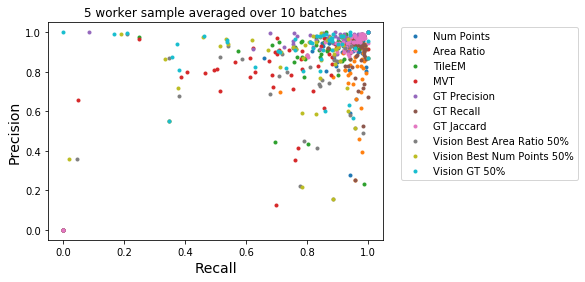

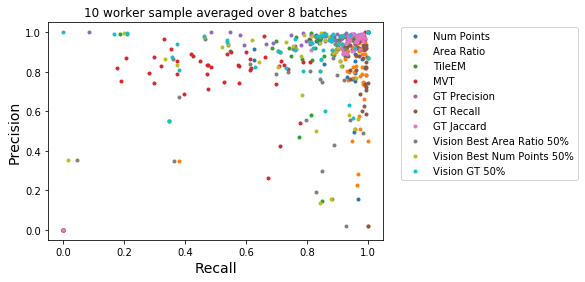

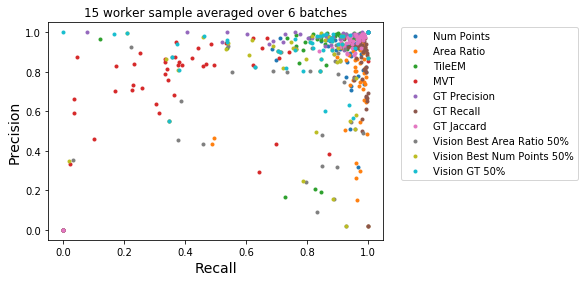

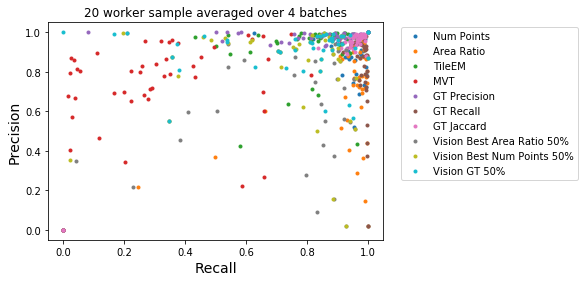

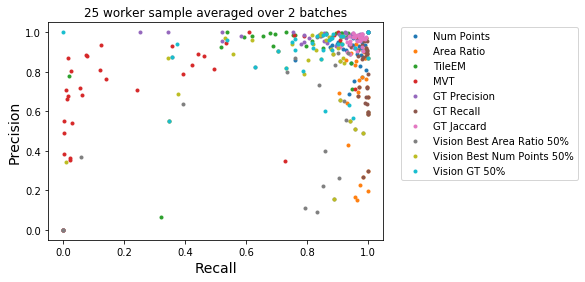

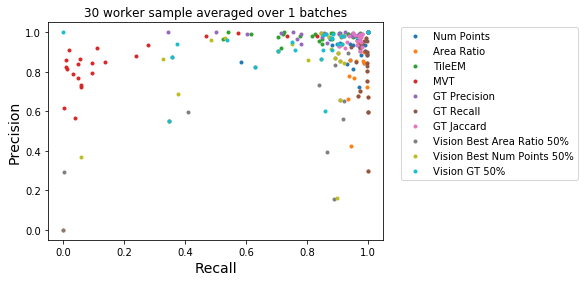

In [113]:
for Nsample in Nsample_lst:
    plot_PR(Nsample,['Num Points','Area Ratio','TileEM','MVT','GT Precision','GT Recall','GT Jaccard',\
                     'Vision Best Area Ratio 50%','Vision Best Num Points 50%','Vision GT 50%'])

In [177]:
def plot_sample_worker_PR(selected_attr_lst,y_axis='Precision'):
    plt.figure()
    selected_col_lst =[]
    for attr in selected_attr_lst:
        if y_axis=="Precision":selected_col_lst.append("P [{}]".format(attr))
        if y_axis=="Recall":selected_col_lst.append("R [{}]".format(attr))
    df_all = pd.DataFrame() #mean 
    df_all_std = pd.DataFrame() # std
    cols  = []
    y_err_lst = []
    y_val_lst =[]
    sample_lst = sorted(Nsample_lst)[:4]
    for Nsample in sample_lst:
        df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        cols.append(Nsample)
        y_val_lst.append(list(df[selected_col_lst].mean()))
        y_err_lst.append(list(df[selected_col_lst].std()))

    y_val_lst = np.array(y_val_lst).T
    y_err_lst = np.array(y_err_lst).T
    for i in range(len(y_val_lst)):
        plt.plot(sample_lst,y_val_lst[i],label=selected_col_lst[i])
        #plt.errorbar(sample_lst,y_val_lst[i],label=selected_col_lst[i], yerr=y_err_lst[i],capsize=3)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel("N sample",fontsize=13)
    plt.ylabel(y_axis,fontsize=13)
    #plt.ylim(0,1)

In [152]:
best_TileEM_attr = 'TileEM thres=40'
selected_attr_lst = ['Num Points','Area Ratio','MVT','GT Precision','GT Recall','GT Jaccard','Vision GT 50%']
selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)

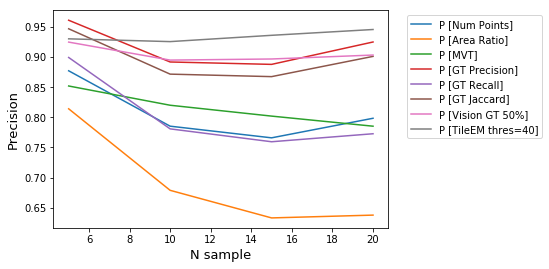

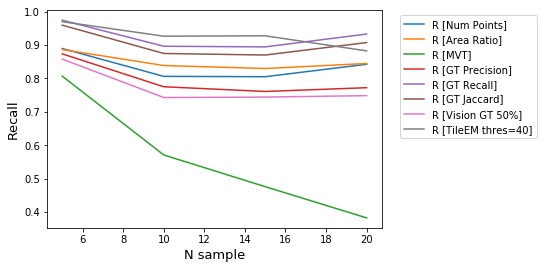

In [178]:
plot_sample_worker_PR(selected_attr_lst,y_axis="Precision")

plot_sample_worker_PR(selected_attr_lst,y_axis="Recall")

In [238]:
best_TileEM_attr = 'TileEM thres=40'
selected_attr_lst = ['Num Points','Area Ratio','MVT','GT Jaccard','Vision GT 50%']
selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)

In [251]:
def plot_sample_worker_PR_subplots():
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    y_axis="Precision"
    selected_col_lst =[]
    for attr in selected_attr_lst:
        if y_axis=="Precision":selected_col_lst.append("P [{}]".format(attr))
        if y_axis=="Recall":selected_col_lst.append("R [{}]".format(attr))
    df_all = pd.DataFrame() #mean 
    df_all_std = pd.DataFrame() # std
    cols  = []
    y_err_lst = []
    y_val_lst =[]
    sample_lst = sorted(Nsample_lst)[:4]
    for Nsample in sample_lst:
        df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        cols.append(Nsample)
        y_val_lst.append(list(df[selected_col_lst].mean()))
        y_err_lst.append(list(df[selected_col_lst].std()))

    y_val_lst = np.array(y_val_lst).T
    y_err_lst = np.array(y_err_lst).T
    lines=[]
    for i in range(len(y_val_lst)):
        lines.append(ax1.plot(sample_lst,y_val_lst[i])[0])#,label=selected_col_lst[i])
        #plt.errorbar(sample_lst,y_val_lst[i],label=selected_col_lst[i], yerr=y_err_lst[i],capsize=3)
    ax1.legend(lines,selected_attr_lst, loc="lower left",fontsize=9)
    ax1.set_xlabel("N sample",fontsize=13)
    ax1.set_ylabel(y_axis,fontsize=13)
    #plt.ylim(0,1)
    #ax2 =plt.subplot(2, 1, 2)
    y_axis='Recall'

    selected_col_lst =[]
    for attr in selected_attr_lst:
        if y_axis=="Precision":selected_col_lst.append("P [{}]".format(attr))
        if y_axis=="Recall":selected_col_lst.append("R [{}]".format(attr))
    df_all = pd.DataFrame() #mean 
    df_all_std = pd.DataFrame() # std
    cols  = []
    y_err_lst = []
    y_val_lst =[]
    sample_lst = sorted(Nsample_lst)[:4]
    for Nsample in sample_lst:
        df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        cols.append(Nsample)
        y_val_lst.append(list(df[selected_col_lst].mean()))
        y_err_lst.append(list(df[selected_col_lst].std()))

    y_val_lst = np.array(y_val_lst).T
    y_err_lst = np.array(y_err_lst).T
    for i in range(len(y_val_lst)):
        ax2.plot(sample_lst,y_val_lst[i])#,label=selected_attr_lst[i])
        #plt.errorbar(sample_lst,y_val_lst[i],label=selected_col_lst[i], yerr=y_err_lst[i],capsize=3)
    ax2.set_xlabel("N sample",fontsize=13)
    ax2.set_ylabel(y_axis,fontsize=13)
    f.savefig('../../docs/overleaf_paper/plots/PRsample.pdf')

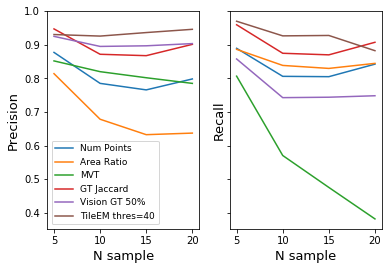

In [252]:
plot_sample_worker_PR_subplots()

In [242]:
def plot_PR_vary_sample_size(algorithm):
    plt.figure()
    plt.title("PR across different worker samples [{}]".format(algorithm),fontsize=14)

    for Nsample in Nsample_lst:
        df = pd.read_csv("sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        plt.plot(df["R [{}]".format(algorithm)],df["P [{}]".format(algorithm)],'.',label="N={}".format(Nsample))

    plt.xlabel("Recall",fontsize=13)
    plt.ylabel("Precision",fontsize=13)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

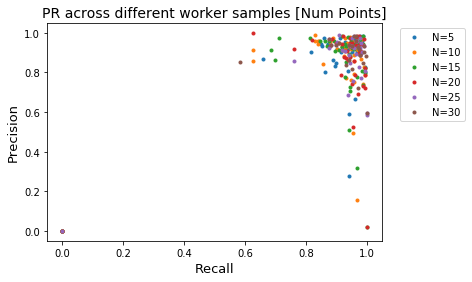

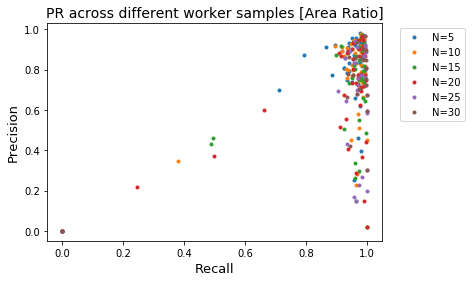

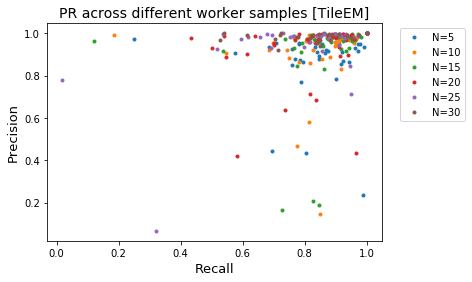

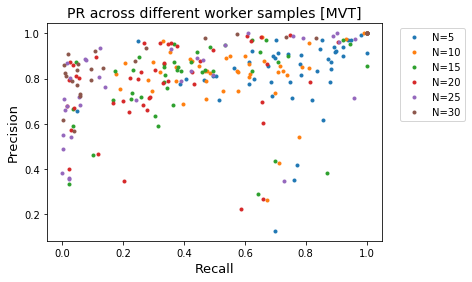

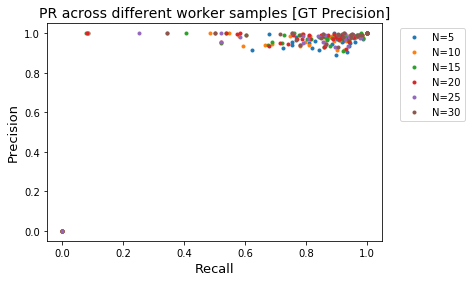

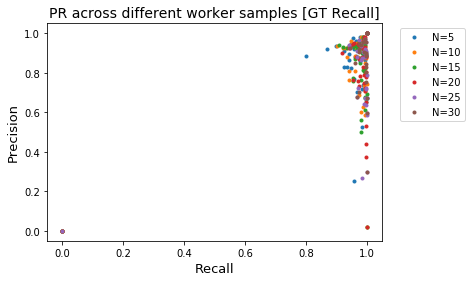

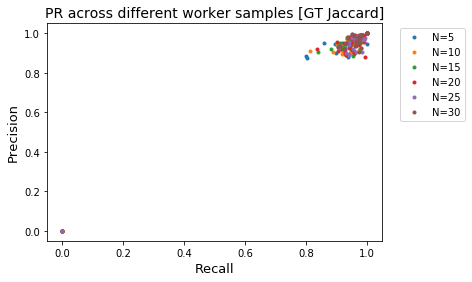

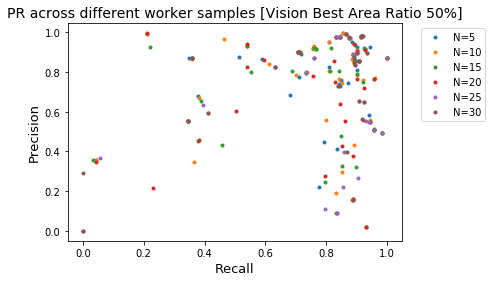

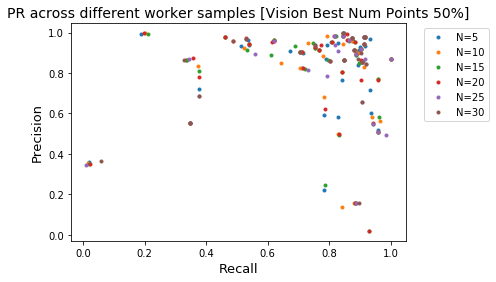

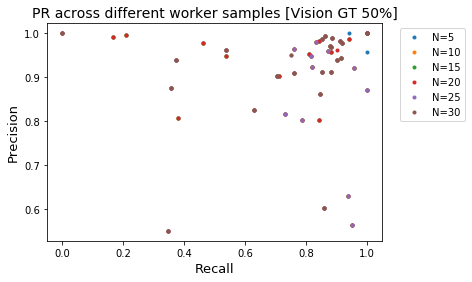

In [139]:
for algo in selected_attr_lst:
    plot_PR_vary_sample_size(algo)

# Effects of varying threshold

In [130]:
def plot_vary_threshold(Nworker):
    plt.figure()
    tbl= pd.read_csv("concat_sample{}_PR.csv".format(Nworker),index_col=0)
    thres_lst = [-40,-20,0,20,40]
    plt.plot(thres_lst,list(tbl.filter(regex="TileEM").filter(regex="P").mean()),label="Precision")
    plt.plot(thres_lst,list(tbl.filter(regex="TileEM").filter(regex="R").mean()),label="Recall")
    plt.title("N worker={}".format(Nworker),fontsize=14)
    plt.xlabel("Threshold",fontsize=13)
    plt.legend()

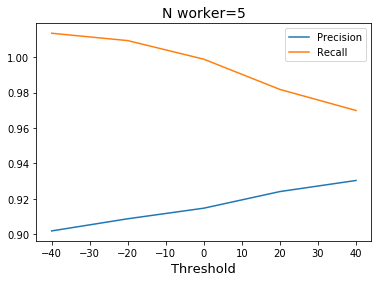

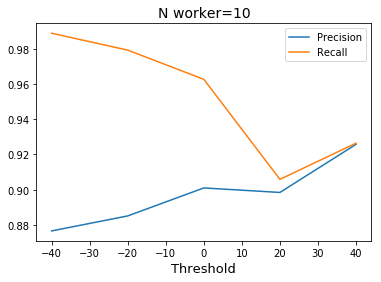

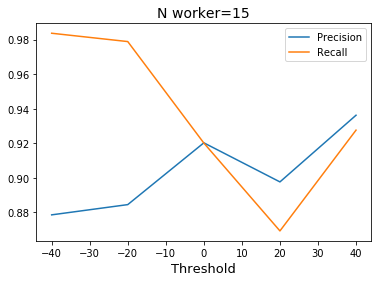

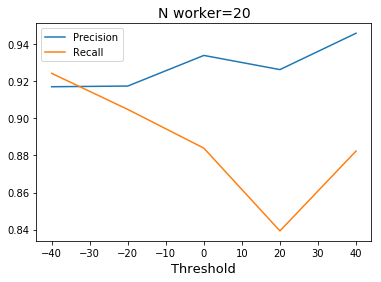

In [179]:
for Nworker in worker_Nbatches.keys()[:4]:
    plot_vary_threshold(Nworker)

# Analysis on Difficult Tasks

In [ ]:
task_ambiguity = [1,4,35,40,41,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]
lossless_vtiles=[ 5,  6,  8,  9, 14, 15, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30,33, 35, 37, 46] #  with decent looking vtiles 
all_hard_tasks = list(set(np.concatenate((task_ambiguity,small_area,high_numPts))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]
selected_objids = [objid  for objid in easy_tasks if objid not in lossless_vtiles]

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(all_hard_tasks)]
filtered_df.mean()

In [ ]:
Both Num Points and Area ratio are somewhat recall heavy, they don't work as well when the task is ambiguous

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

# Examining Good and bad workers 

---------------------------------------------------------------------------------------------------------